<a href="https://colab.research.google.com/github/rmhanna/Randa/blob/main/IQR_Heart_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IQR Outlier Detection on Heart Dataset

This notebook implements the Interquartile Range (IQR) algorithm to detect outliers across numeric columns in the **heart.csv** dataset.

**IQR rule:** For a numeric feature, values outside `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` are flagged as outliers.

Total rows: 918
Numeric columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Rows flagged as outliers: 330

Per-column summary:
Age {'Q1': np.float64(47.0), 'Q3': np.float64(60.0), 'IQR': np.float64(13.0), 'lower': np.float64(27.5), 'upper': np.float64(79.5), 'outlier_count': 0}
RestingBP {'Q1': np.float64(120.0), 'Q3': np.float64(140.0), 'IQR': np.float64(20.0), 'lower': np.float64(90.0), 'upper': np.float64(170.0), 'outlier_count': 28}
Cholesterol {'Q1': np.float64(173.25), 'Q3': np.float64(267.0), 'IQR': np.float64(93.75), 'lower': np.float64(32.625), 'upper': np.float64(407.625), 'outlier_count': 183}
FastingBS {'Q1': np.float64(0.0), 'Q3': np.float64(0.0), 'IQR': np.float64(0.0), 'lower': np.float64(0.0), 'upper': np.float64(0.0), 'outlier_count': 214}
MaxHR {'Q1': np.float64(120.0), 'Q3': np.float64(156.0), 'IQR': np.float64(36.0), 'lower': np.float64(66.0), 'upper': np.float64(210.0), 'outlier_count': 2}
Oldpeak {'Q1': np.float64(0.0), 'Q

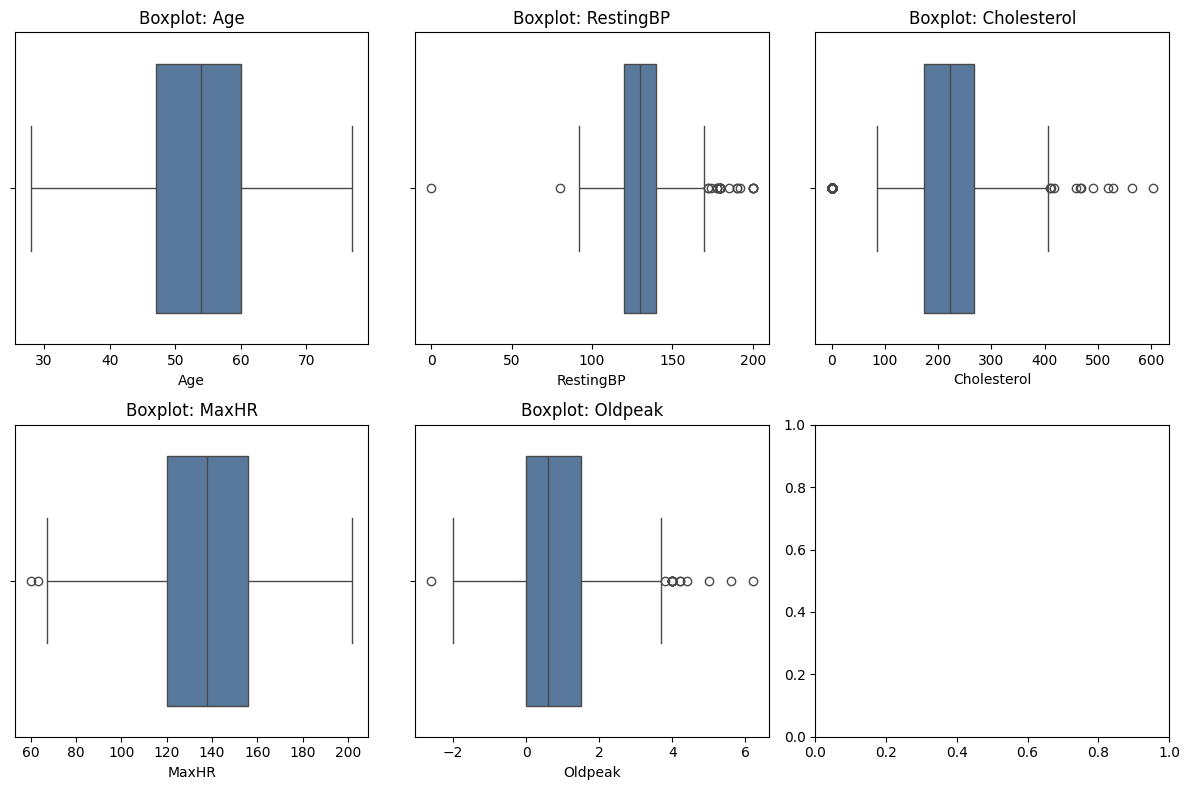

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/heart.csv')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


def iqr_outliers(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor*IQR
    upper = Q3 + factor*IQR
    mask = (series < lower) | (series > upper)
    return {'Q1':Q1,'Q3':Q3,'IQR':IQR,'lower':lower,'upper':upper,'outlier_count':int(mask.sum())}, mask

summaries = {}
all_masks = []
for col in numeric_cols:
    summary, mask = iqr_outliers(df[col])
    summaries[col] = summary
    all_masks.append(mask)

any_outlier_mask = np.column_stack(all_masks).any(axis=1)

outliers_df = df.loc[any_outlier_mask]
non_outliers_df = df.loc[~any_outlier_mask]

print('Total rows:', len(df))
print('Numeric columns:', numeric_cols)
print('Rows flagged as outliers:', int(any_outlier_mask.sum()))
print('\nPer-column summary:')
for col, s in summaries.items():
    print(col, s)

# Boxplots for key variables
plot_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
fig, axes = plt.subplots(2,3, figsize=(12,8))
for i, col in enumerate(plot_cols):
    if col in df.columns:
        ax = axes.flat[i]
        sns.boxplot(x=df[col], ax=ax, color='#4C78A8')
        ax.set_title(f'Boxplot: {col}')
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
outliers_df.to_csv('rows_with_any_outlier.csv', index=False)
non_outliers_df.to_csv('rows_without_outliers.csv', index=False)

In [ ]:

import pandas as pd

outliers = pd.read_csv('rows_with_any_outlier.csv')
clean = pd.read_csv('rows_without_outliers.csv')

# Basic info
print('Outliers shape:', outliers.shape)
print('Clean shape:', clean.shape)

# Preview first rows
print(outliers.head())
print(clean.head())

# Column info
outliers.info()


Outliers shape: (330, 12)
Clean shape: (588, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   53   F           ATA        113          468          0     Normal    127   
1   53   M           NAP        145          518          0     Normal    130   
2   65   M           ASY        140          306          1     Normal     87   
3   48   F           ATA        120          177          1         ST    148   
4   45   M           ATA        140          224          1     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      0.0     Flat             1  
2              Y      1.5     Flat             1  
3              N      0.0       Up             0  
4              N      0.0       Up             0  
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172

In [ ]:

# Missing values
print(outliers.isna().sum())
print(clean.isna().sum())

# Duplicates
print('Outliers duplicates:', outliers.duplicated().sum())
print('Clean duplicates:', clean.duplicated().sum())

# Quick checks for odd values
print('Outliers RestingBP <= 0:', (outliers['RestingBP'] <= 0).sum())
print('Outliers Oldpeak < 0:', (outliers['Oldpeak'] < 0).sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Outliers duplicates: 0
Clean duplicates: 0
Outliers RestingBP <= 0: 1
Outliers Oldpeak < 0: 12


# New section

In [ ]:

# Numeric columns summary
print(outliers.describe())
print(clean.describe())

# Categorical columns summary
categoricals = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in categoricals:
    if col in outliers.columns:
        print(f'Outliers {col}:\n', outliers[col].value_counts())
    if col in clean.columns:
        print(f'Clean {col}:\n', clean[col].value_counts())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  330.000000  330.000000   330.000000  330.000000  330.000000   
mean    56.696970  135.996970   127.054545    0.648485  127.996970   
std      8.344355   22.820363   143.858012    0.478168   25.397089   
min     32.000000    0.000000     0.000000    0.000000   60.000000   
25%     52.000000  120.000000     0.000000    0.000000  111.000000   
50%     57.000000  134.000000     0.000000    1.000000  127.000000   
75%     62.000000  150.000000   248.000000    1.000000  145.000000   
max     75.000000  200.000000   603.000000    1.000000  195.000000   

          Oldpeak  HeartDisease  
count  330.000000    330.000000  
mean     1.039091      0.778788  
std      1.218357      0.415693  
min     -2.600000      0.000000  
25%      0.000000      1.000000  
50%      1.000000      1.000000  
75%      1.800000      1.000000  
max      6.200000      1.000000  
              Age   RestingBP  Cholesterol  FastingBS       Max

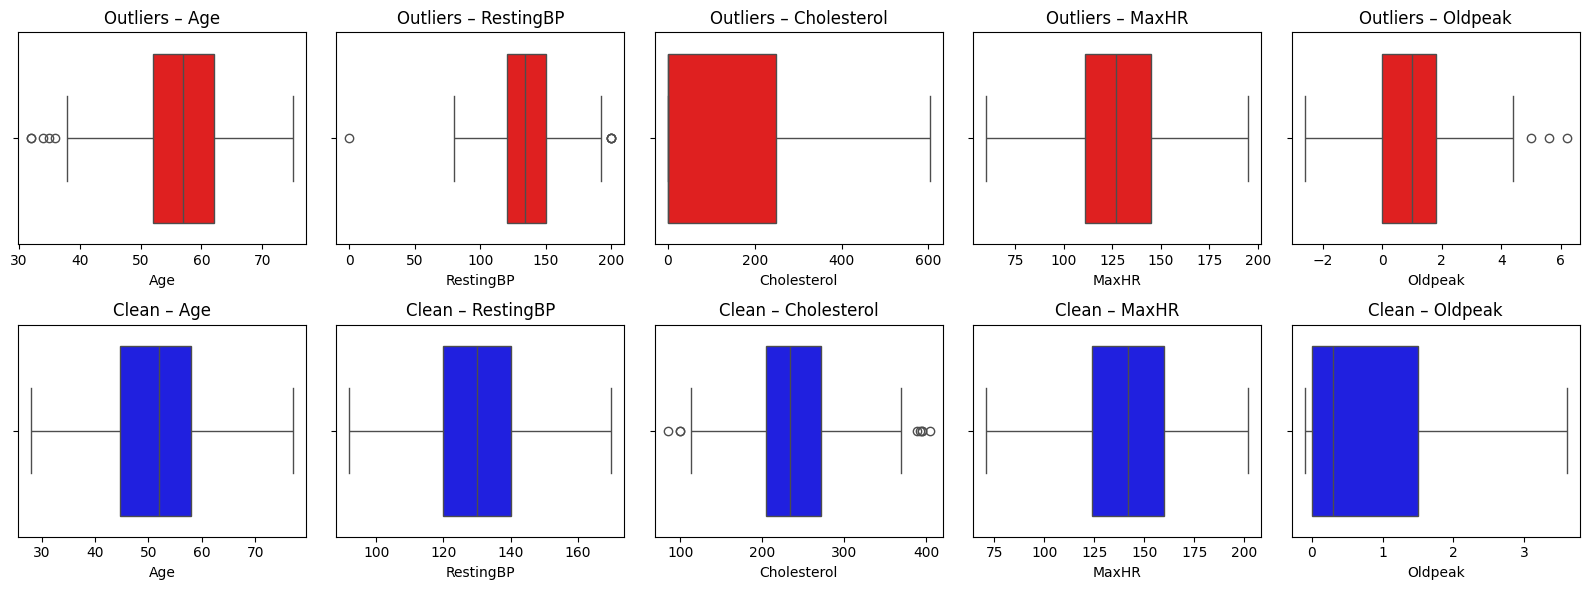

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

fig, axes = plt.subplots(2, len(num_cols), figsize=(16,6))
for i, col in enumerate(num_cols):
    sns.boxplot(x=outliers[col], ax=axes[0,i], color='red')
    axes[0,i].set_title(f'Outliers – {col}')
    sns.boxplot(x=clean[col], ax=axes[1,i], color='blue')
    axes[1,i].set_title(f'Clean – {col}')
plt.tight_layout()
plt.show()


In [ ]:

def compare_groups(numeric_cols):
    comp = []
    for col in numeric_cols:
        comp.append({
            'feature': col,
            'outliers_mean': outliers[col].mean(),
            'clean_mean': clean[col].mean(),
            'outliers_median': outliers[col].median(),
            'clean_median': clean[col].median()
        })
    return pd.DataFrame(comp)

numeric_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
comparison_table = compare_groups(numeric_cols)
print(comparison_table)


       feature  outliers_mean  clean_mean  outliers_median  clean_median
0          Age      56.696970   51.722789             57.0          52.0
1    RestingBP     135.996970  130.375850            134.0         130.0
2  Cholesterol     127.054545  239.064626              0.0         234.0
3        MaxHR     127.996970  141.755102            127.0         142.0
4      Oldpeak       1.039091    0.802211              1.0           0.3


In [ ]:

print('HeartDisease rate in Outliers:', outliers['HeartDisease'].mean())
print('HeartDisease rate in Clean:', clean['HeartDisease'].mean())

# Group means by HeartDisease
for name, df in [('Outliers', outliers), ('Clean', clean)]:
    print(f'\n{name} group means:')
    print(df.groupby('HeartDisease')[['RestingBP','Cholesterol','MaxHR','Oldpeak','Age']].mean())


HeartDisease rate in Outliers: 0.7787878787878788
HeartDisease rate in Clean: 0.4268707482993197

Outliers group means:
               RestingBP  Cholesterol       MaxHR   Oldpeak        Age
HeartDisease                                                          
0             137.232877   190.643836  140.794521  0.579452  56.164384
1             135.645914   108.992218  124.361868  1.169650  56.848249

Clean group means:
               RestingBP  Cholesterol       MaxHR   Oldpeak        Age
HeartDisease                                                          
0             128.652819   235.023739  149.744807  0.370920  49.335312
1             132.689243   244.490040  131.027888  1.381275  54.928287


In [ ]:

comparison_table.to_csv('comparison_outliers_vs_clean.csv', index=False)
outliers.describe().to_csv('outliers_describe.csv')
clean.describe().to_csv('clean_describe.csv')

print("*********comparision table ********** \n", comparison_table.describe())
,
print("*********outliers table ********** \n", outliers.describe())

print("*********clean table ********** \n", clean.describe())


*********comparision table ********** 
        outliers_mean  clean_mean  outliers_median  clean_median
count       5.000000    5.000000         5.000000      5.000000
mean       89.756909  112.744116        63.800000    111.660000
std        59.066424   91.329047        65.159036     89.699933
min         1.039091    0.802211         0.000000      0.300000
25%        56.696970   51.722789         1.000000     52.000000
50%       127.054545  130.375850        57.000000    130.000000
75%       127.996970  141.755102       127.000000    142.000000
max       135.996970  239.064626       134.000000    234.000000
*********outliers table ********** 
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  330.000000  330.000000   330.000000  330.000000  330.000000   
mean    56.696970  135.996970   127.054545    0.648485  127.996970   
std      8.344355   22.820363   143.858012    0.478168   25.397089   
min     32.000000    0.000000     0.000000    0.000000   60.000000 